In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
os.getcwd()

'C:\\Users\\Bionicz\\Documents\\Belajar\\Loan Prediction - Analytics Vidya'

In [46]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [47]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [49]:
df_train.drop("Loan_ID",axis=1,inplace=True)
df_test.drop("Loan_ID",axis=1,inplace=True)

# Deskripsi
- Loan_ID = ID Peminjam
- Gender = Jenis Kelamin
- Married = Status Pernikahan
- Dependents = Jumlah Tanggungan
- Education = Tingkat Pendidikan
- Self_Employed = Wiraswasta atau tidak
- ApplicantIncome = Gaji Peminjam
- CoapplicantIncome = Gaji orang terdekat?
- LoanAmount = Jumlah Pinjaman
- Loan_Amount_Term = Lama Cicilan
- Credit_History = Good/Bad
- Property_Area = Lingkungan Rumah
- Loan_Status = Keputusan

Mengecek nilai yang Null

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Terdapat beberapa kolom yang masih memiliki nilai Null. Untuk kolom yang bernilai kategorik nilai Nullnya akan diisi menggunakan modus dari kolom tersebut

In [51]:
print("-----Before-----")
print(df_train.Gender.value_counts())
df_train.Gender.replace(np.nan,"Male",inplace=True)
print("-----After-----")
print(df_train.Gender.value_counts())

-----Before-----
Male      489
Female    112
Name: Gender, dtype: int64
-----After-----
Male      502
Female    112
Name: Gender, dtype: int64


In [52]:
print("-----Before-----")
print(df_train.Married.value_counts())
df_train.Married.replace(np.nan,"Yes", inplace=True)
print("-----After-----")
print(df_train.Married.value_counts())

-----Before-----
Yes    398
No     213
Name: Married, dtype: int64
-----After-----
Yes    401
No     213
Name: Married, dtype: int64


In [53]:
print("-----Before-----")
print(df_train.Dependents.value_counts())
df_train.Dependents.replace(np.nan,"0",inplace=True)
print("-----After-----")
print(df_train.Dependents.value_counts())

-----Before-----
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
-----After-----
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [54]:
print("-----Before-----")
print(df_train.Self_Employed.value_counts())
df_train.Self_Employed.replace(np.nan,"No",inplace=True)
print("-----After-----")
print(df_train.Self_Employed.value_counts())

-----Before-----
No     500
Yes     82
Name: Self_Employed, dtype: int64
-----After-----
No     532
Yes     82
Name: Self_Employed, dtype: int64


In [55]:
print("-----Before-----")
print(df_train.Credit_History.value_counts())
df_train.Credit_History.replace(np.nan, 1, inplace=True)
print("-----After-----")
print(df_train.Credit_History.value_counts())

-----Before-----
1.0    475
0.0     89
Name: Credit_History, dtype: int64
-----After-----
1.0    525
0.0     89
Name: Credit_History, dtype: int64


In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [57]:
print("-----Before-----")
print(df_train.Loan_Amount_Term.value_counts())
df_train.Loan_Amount_Term.replace(np.nan,360,inplace=True)
print("-----After-----")
print(df_train.Loan_Amount_Term.value_counts())

-----Before-----
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
-----After-----
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [58]:
#Replace NaN with mean
df_train.LoanAmount.replace(np.nan,round(df_train.LoanAmount.describe().mean()),inplace=True)

In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [60]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,241.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
df_train.Loan_Status = np.where(df_train.Loan_Status == "Y",0,1)

# Plotting

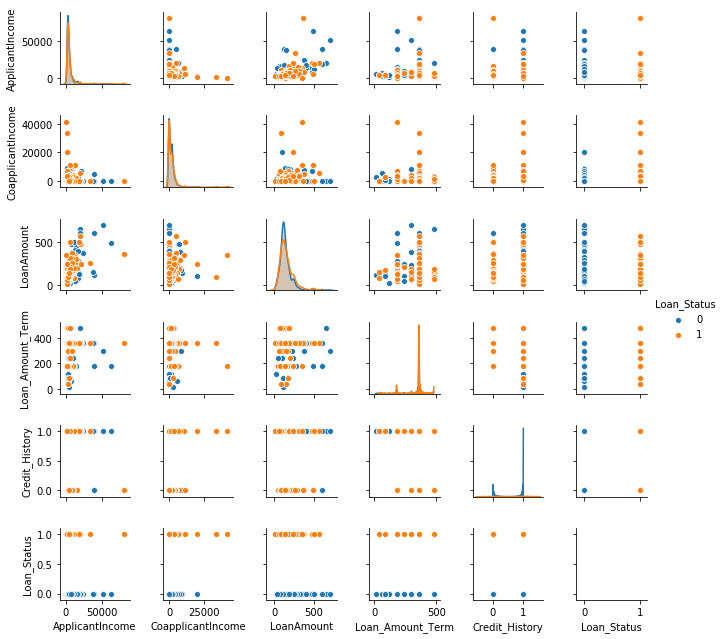

In [62]:
sns.pairplot(df_train, hue="Loan_Status", height = 1.5)

In [63]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,241.0,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import RobustScaler

In [100]:
def CMatrix(CM, labels = ["pay","default"]):
    df = pd.DataFrame(CM, index = labels, columns = labels)
    df.index.name = "TRUE"
    df.columns.name = "PREDICTION"
    df.loc["Total"] = df.sum()
    df["Total"] = df.sum(axis=1)
    return df

In [95]:
x = df_train.drop("Loan_Status",axis=1)
x = pd.get_dummies(x)
col = x.columns.values
rs = RobustScaler()
x = pd.DataFrame(rs.fit_transform(x),columns=col)

y = df_train["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=123, stratify = y)

In [96]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.698029,-0.517358,1.498328,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.264096,0.139079,-0.013378,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.278492,-0.517358,-0.842809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,1.0
3,-0.421422,0.509087,-0.120401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.749786,-0.517358,0.160535,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.312768,-0.517358,-0.775920,0.0,0.0,1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
610,0.100600,-0.517358,-1.190635,-180.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
611,1.459983,-0.412885,1.658863,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
612,1.292374,-0.517358,0.775920,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [97]:
metrics = pd.DataFrame(index = ["Accuracy", "Precision", "Recall"], columns = ["LogReg","DecTree","NaiveBayes"])

# Logistic Regression 

In [105]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

metrics.loc["Accuracy","LogReg"] = accuracy_score(y_test, lr_pred)
metrics.loc["Precision","LogReg"] = precision_score(y_test, lr_pred)
metrics.loc["Recall","LogReg"] = recall_score(y_test, lr_pred)

cm = confusion_matrix(y_test, lr_pred)
CMatrix(cm)

C:\Users\Bionicz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


PREDICTION,pay,default,Total
TRUE,,,
pay,102,4,106
default,32,16,48
Total,134,20,154


# Decision Tree 

In [107]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc_pred = dc.predict(x_test)

metrics.loc["Accuracy","DecTree"] = accuracy_score(y_test, dc_pred)
metrics.loc["Precision","DecTree"] = precision_score(y_test, dc_pred)
metrics.loc["Recall","DecTree"] = recall_score(y_test, dc_pred)

cm = confusion_matrix(y_test, dc_pred)
CMatrix(cm)

PREDICTION,pay,default,Total
TRUE,,,
pay,77,29,106
default,25,23,48
Total,102,52,154


# Naive Bayes 

In [129]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)

metrics.loc["Accuracy","NaiveBayes"] = accuracy_score(y_test, nb_pred)
metrics.loc["Precision","NaiveBayes"] = precision_score(y_test, nb_pred)
metrics.loc["Recall","NaiveBayes"] = recall_score(y_test, nb_pred)

cm = confusion_matrix(y_test, nb_pred)
CMatrix(cm)

PREDICTION,pay,default,Total
TRUE,,,
pay,98,8,106
default,30,18,48
Total,128,26,154


In [125]:
metrics * 100

,LogReg,DecTree,NaiveBayes
Accuracy,76.6234,64.9351,75.3247
Precision,80,44.2308,69.2308
Recall,33.3333,47.9167,37.5


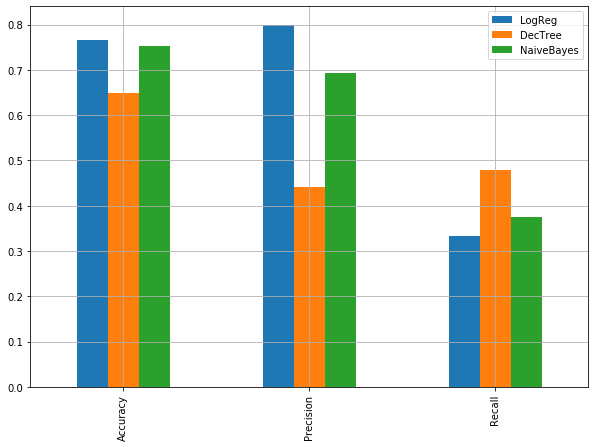

In [126]:
fig, ax = plt.subplots(figsize=(10,7))
metrics.plot(kind="bar", ax=ax)
ax.grid()

In [144]:
tres = [round(0.1*i,1) if i < 10 else 1 for i in range(1,11) ]

In [145]:
tres

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [185]:
mod_metrics = pd.DataFrame(index=tres,columns=["Res","Precision","Recall"])
mod_metrics.index.name = "Prob"

In [186]:
len(lr.predict_proba(x_test))

154

In [214]:
for tresh in tres:
    lr_pred_prob = lr.predict_proba(x_test)
    mod_metrics.loc[tresh,"Res"] = [1 if lr_pred_prob[x][1] >= tresh else 0 for x in range(len(lr_pred_prob))]
    mod_metrics.loc[tresh,"Precision"] = precision_score(y_test,mod_metrics.loc[tresh,"Res"])
    mod_metrics.loc[tresh,"Recall"] = recall_score(y_test,mod_metrics.loc[tresh,"Res"])

C:\Users\Bionicz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [215]:
mod_metrics

,Res,Precision,Recall
Prob,,,
0.1,"[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, ...",0.340741,0.958333
0.2,"[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, ...",0.397727,0.729167
0.3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...",0.521739,0.5
0.4,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.72,0.375
0.5,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.8,0.333333
0.6,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.842105,0.333333
0.7,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.833333,0.3125
0.8,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.8125,0.270833
0.9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.777778,0.145833


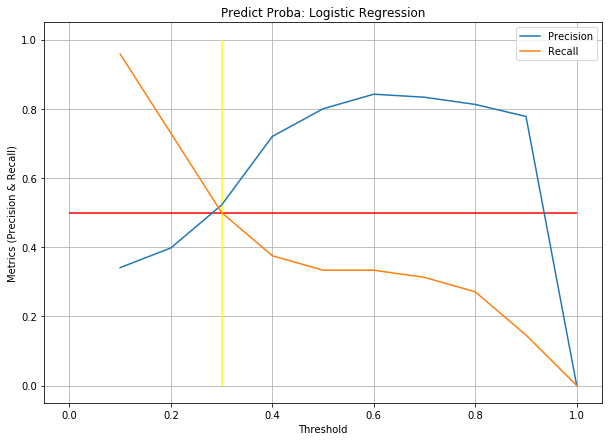

In [217]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(mod_metrics.index,mod_metrics.Precision,label="Precision")
ax.plot(mod_metrics.index,mod_metrics.Recall,label="Recall")
ax.set_xlabel("Threshold")
ax.set_ylabel("Metrics (Precision & Recall)")
ax.set_title("Predict Proba: Logistic Regression")
ax.hlines(y=0.5, xmin = 0, xmax=1,colors='red')
ax.vlines(x=0.3, ymin = 0, ymax=1,colors='yellow')
ax.legend()
ax.grid()

In [222]:
new_pred = lr.predict_proba(x_test)[:,1]
new_pred2 = (new_pred >= 0.3).astype(int)

CM = confusion_matrix(y_test,new_pred2)
print("Precision = {}".format(precision_score(y_test,new_pred2)))
print("Recall = {}".format(recall_score(y_test,new_pred2)))
CMatrix(CM)

Precision = 0.5217391304347826
Recall = 0.5


PREDICTION,pay,default,Total
TRUE,,,
pay,84,22,106
default,24,24,48
Total,108,46,154
